# Samsung

## Analayse des ventes Samsung

### Partie 1

<div class="alert alert-success">
    <b>Exploration de Données</b>
</div>

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("Ventes_Samsung.csv")

In [97]:
data.head()

,ID_Vente,ID_Produit,Quantité_Vendue,Date_Vente,ID_Client,Montant_Total,Délai_Livraison_Jours,Score_Satisfaction,Méthode_Expédition,Canal_Achat,Pays_Vente
0,V0001,P751,5,2021-04-01,C955,4995,27,4.101503,Standard,En ligne,Allemagne
1,V0002,P1335,1,2021-03-16,C231,649,20,4.316370,Express,Revendeur,France
2,V0003,P1160,4,2021-01-04,C693,7996,28,4.846014,Express,Revendeur,Corée
3,V0004,P346,2,2021-11-23,C280,798,20,1.812859,Standard,Magasin,Allemagne
4,V0005,P1149,4,2021-12-23,C320,756,19,3.791627,Standard,Magasin,France


In [6]:
data.describe().round(2)

,Quantité_Vendue,Montant_Total,Délai_Livraison_Jours,Score_Satisfaction
count,2000.00,2000.00,2000.00,2000.00
mean,2.98,3313.64,15.42,3.04
std,1.42,3319.64,8.70,1.16
min,1.00,189.00,1.00,1.00
25%,2.00,945.00,8.00,2.04
50%,3.00,1999.00,16.00,3.08
75%,4.00,4398.00,23.00,4.02
max,5.00,14995.00,30.00,5.00


In [7]:
# Par exemple on constate que la dispersion de la quantité vendue est tout à fait normale (std). 
# A l'inverse, pour le montant totale, la dispersion est assez grande, 
# et on constate une grande différence entre le montant maximum, et le montant maximum du 3ème quartile.

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Vente               2000 non-null   object 
 1   ID_Produit             2000 non-null   object 
 2   Quantité_Vendue        2000 non-null   int64  
 3   Date_Vente             2000 non-null   object 
 4   ID_Client              2000 non-null   object 
 5   Montant_Total          2000 non-null   int64  
 6   Délai_Livraison_Jours  2000 non-null   int64  
 7   Score_Satisfaction     2000 non-null   float64
 8   Méthode_Expédition     2000 non-null   object 
 9   Canal_Achat            2000 non-null   object 
 10  Pays_Vente             2000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 172.0+ KB


In [100]:
data['Date_Vente'] = pd.to_datetime(data['Date_Vente'])

In [101]:
for elem in ['Pays_Vente', 'Canal_Achat', 'Méthode_Expédition', 'ID_Vente', 'ID_Produit']:
    data[elem] = data[elem].astype('category')

In [102]:
data.isnull().sum()

ID_Vente                 0
ID_Produit               0
Quantité_Vendue          0
Date_Vente               0
ID_Client                0
Montant_Total            0
Délai_Livraison_Jours    0
Score_Satisfaction       0
Méthode_Expédition       0
Canal_Achat              0
Pays_Vente               0
dtype: int64

Il n'y a donc pas de valeurs manquantes.

In [103]:
len(data)

2000

**2000 ventes** ont été enrengistrées.

In [104]:
# Montant total
data['Montant_Total'].sum()

6627270

**6627270** est le montant total

### Partie 2

<div class="alert alert-success">
    <b>Analyse des ventes</b>
</div>

1. Identifier le produit le plus vendu (en quantité).
2. Calculer le revenu moyen par vente.
3. Déterminer le pays avec le plus grand nombre de ventes.

In [105]:
# Grouper par 'ID_Produit' et sommer les 'Quantité_Vendue'
produit_quantite_totale = data.groupby('ID_Produit', observed=True)['Quantité_Vendue'].sum()

# Produit avec la quantité totale la plus élevée
produit_le_plus_vendu = produit_quantite_totale.idxmax()
quantite_maximale = produit_quantite_totale.max()

# Afficher le résultat
print(f"Le produit le plus vendu est {produit_le_plus_vendu} avec une quantité totale de {quantite_maximale}")

Le produit le plus vendu est P418 avec une quantité totale de 20


In [106]:
# Revenu moyen par vente.
data['Montant_Total'].mean()

3313.635

In [107]:
# Grouper par "Pays_vente"
data.groupby("Pays_Vente", observed=True)['Montant_Total'].sum().sort_values(ascending=False)

Pays_Vente
USA          1443966
Chine        1351515
France       1298166
Allemagne    1279714
Corée        1253909
Name: Montant_Total, dtype: int64

Le pays avec le plus grand nombre de ventes sont les **USA**.

### Partie 3

<div class="alert alert-success">
    <b>Manipulation des données</b>
</div>

In [108]:
# Je crée une liste pour chaque ID du montant moyen dépensé pour chaque produit vendu.
Montant_Moyen_Par_Produit = data.groupby("ID_Produit", observed=True)['Montant_Total'].transform('mean')

In [109]:
# J'assigne cette liste à ma nouvelle colonne.
data['Montant_Moyen_Par_Produit'] = Montant_Moyen_Par_Produit

In [110]:
# Filtre sur les ventes réalisées en France
data[data['Pays_Vente'] == 'France']

,ID_Vente,ID_Produit,Quantité_Vendue,Date_Vente,ID_Client,Montant_Total,Délai_Livraison_Jours,Score_Satisfaction,Méthode_Expédition,Canal_Achat,Pays_Vente,Montant_Moyen_Par_Produit
1,V0002,P1335,1,2021-03-16,C231,649,20,4.316370,Express,Revendeur,France,1947.00
4,V0005,P1149,4,2021-12-23,C320,756,19,3.791627,Standard,Magasin,France,519.75
7,V0008,P416,1,2021-11-07,C228,399,16,2.025835,Express,Magasin,France,399.00
9,V0010,P1811,2,2021-06-20,C866,1998,23,4.099450,Express,Magasin,France,2747.25
17,V0018,P705,1,2021-07-14,C343,649,11,3.716018,Express,Revendeur,France,1298.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1965,V1966,P204,4,2021-04-01,C267,796,14,2.862918,Standard,En ligne,France,796.00
1971,V1972,P1035,2,2021-01-06,C882,1298,14,1.597140,Standard,En ligne,France,1298.00
1980,V1981,P1931,1,2021-04-03,C881,999,2,2.254876,Express,Magasin,France,999.00
1993,V1994,P1486,1,2021-09-26,C354,399,5,3.499657,Standard,Magasin,France,1296.75


In [111]:
# Trie sur les données par 'Score_Satisfaction' de manière décroissante
data.sort_values(by= 'Score_Satisfaction', ascending=False).head(10)

,ID_Vente,ID_Produit,Quantité_Vendue,Date_Vente,ID_Client,Montant_Total,Délai_Livraison_Jours,Score_Satisfaction,Méthode_Expédition,Canal_Achat,Pays_Vente,Montant_Moyen_Par_Produit
571,V0572,P1583,3,2021-03-11,C591,8997,29,4.999865,Standard,Magasin,Chine,9996.666667
135,V0136,P1530,1,2021-11-11,C639,1999,5,4.999682,Standard,En ligne,Chine,3331.666667
916,V0917,P1316,4,2021-10-20,C897,1596,18,4.998180,Standard,Magasin,Allemagne,1396.500000
1164,V1165,P400,3,2021-02-06,C222,5997,16,4.997933,Standard,En ligne,Allemagne,5997.000000
356,V0357,P270,3,2021-06-07,C150,5997,14,4.997172,Standard,Revendeur,Corée,5997.000000
270,V0271,P469,1,2021-04-03,C901,189,19,4.995153,Express,Magasin,USA,283.500000
1620,V1621,P1860,3,2021-05-04,C593,5997,6,4.994148,Standard,Magasin,USA,3998.000000
1588,V1589,P1955,4,2021-05-12,C529,2596,8,4.993757,Express,Magasin,USA,2920.500000
1673,V1674,P544,2,2021-11-15,C495,398,28,4.990202,Express,Revendeur,USA,398.000000
136,V0137,P1017,5,2021-01-15,C871,10995,2,4.989960,Standard,Magasin,USA,8796.000000


### Partie 4

<div class="alert alert-success">
    <b>Visualisation des données</b>
</div>

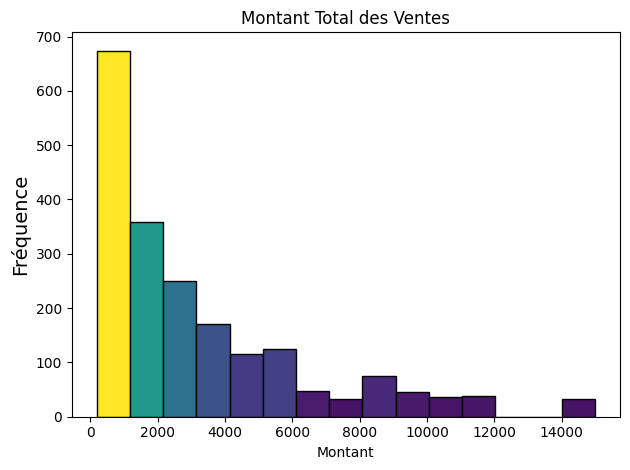

In [112]:
# histogramme représentant la distribution du 'Montant_Total' des ventes.
import matplotlib.colors as mcolors

fig, ax = plt.subplots(tight_layout=True)

# Création de l'histogramme
N, bins, patches = ax.hist(data['Montant_Total'], bins=15, edgecolor='black')

# Normalisation des fréquences
fracs = N / N.max()

# Normalisation des données pour la colormap
norm = mcolors.Normalize(vmin=fracs.min(), vmax=fracs.max())

# Application des couleurs
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
# Titre et labels
plt.title("Montant Total des Ventes")
plt.xlabel('Montant', fontsize=10)
plt.ylabel('Fréquence', fontsize=14)

# Affichage du graphique
plt.show()

In [113]:
# Data frame de la quantité vendue par canal d'achat.
data_quantite_canal = data.groupby(['Canal_Achat'], observed=True)['Quantité_Vendue'].sum().reset_index()

palette = sns.color_palette("viridis")

In [114]:
data_quantite_canal

,Canal_Achat,Quantité_Vendue
0,En ligne,2019
1,Magasin,2074
2,Revendeur,1857


/Users/alelia/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


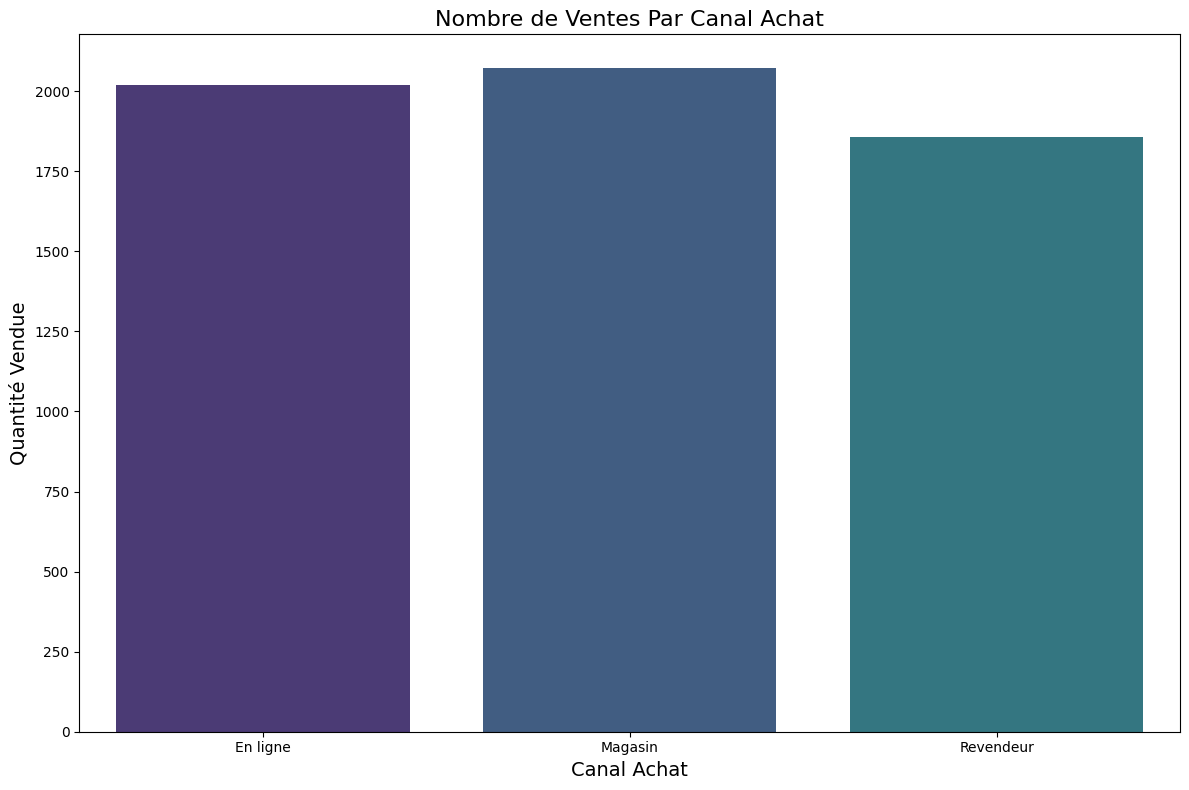

In [115]:
# Créer le graphique en barres montrant le nombre de ventes par 'Canal_Achat'
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    data=data_quantite_canal,
    x='Canal_Achat', 
    y='Quantité_Vendue', 
    palette=palette
)

plt.title('Nombre de Ventes Par Canal Achat', fontsize=16)
plt.xlabel('Canal Achat', fontsize=14)
plt.ylabel('Quantité Vendue', fontsize=14)

# Afficher le graphique
plt.tight_layout()
plt.show()

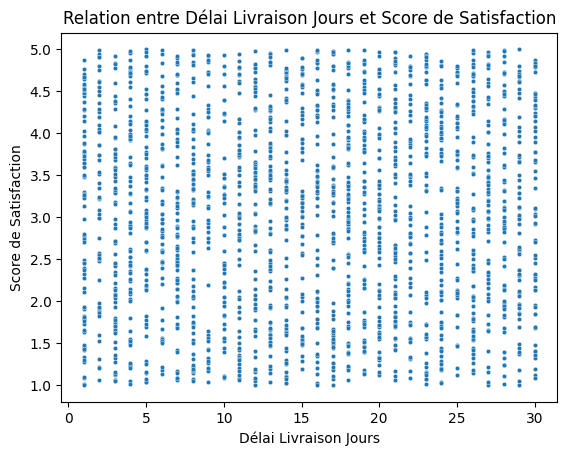

In [116]:
# Nuage de points montrant la relation entre 'Délai_Livraison_Jours' et 'Score_Satisfaction'

sns.scatterplot(x='Délai_Livraison_Jours', y='Score_Satisfaction', data=data, s=10)
plt.title('Relation entre Délai Livraison Jours et Score de Satisfaction')
plt.xlabel('Délai Livraison Jours')
plt.ylabel('Score de Satisfaction')
plt.show()

Il n'y a AUCUNE relation.